In [1]:
import torch
from utils import *
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

srgan_checkpoint = "checkpoint_srgan.pth.tar"

srgan_generator = torch.load(srgan_checkpoint)['generator'].to(device)
srgan_generator.eval()

cuda


/opt/conda/lib/python3.10/site-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.10/site-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.10/site-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'torch.nn.modules.activation.PReLU' has changed. you can retrieve the original source code by accessing the object's source attribute 

Generator(
  (net): SRResNet(
    (conv_block1): ConvolutionalBlock(
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (1): PReLU(num_parameters=1)
      )
    )
    (residual_blocks): Sequential(
      (0): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=1)
          )
        )
        (conv_block2): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
      (1): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Seque

In [2]:
def upscale(img):
    img = Image.open(img, mode="r")
    lr_img = img.resize((int(480), int(270)), Image.LANCZOS)
    lr_img = lr_img.convert('RGB')
    hr_img = srgan_generator(convert_image(lr_img, source='pil', target='imagenet-norm').unsqueeze(0).to(device))
    hr_img = hr_img.squeeze(0).cpu().detach()
    hr_img = convert_image(hr_img, source='[-1, 1]', target='pil')
    return lr_img, hr_img

In [13]:
import gc

del hr_img 
del sr_img_srgan
gc.collect()
torch.cuda.empty_cache()

In [3]:
def upscalendisplay(folder_path="images"):
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Cek jenis gambar
            img_path = os.path.join(folder_path, filename)
            lres_img, hres_img = upscale(img_path)

            plt.figure(figsize=(16*2, 9*2))
            plt.subplot(211)
            plt.imshow(lres_img)
            plt.subplot(212)
            plt.imshow(hres_img)
            plt.show()

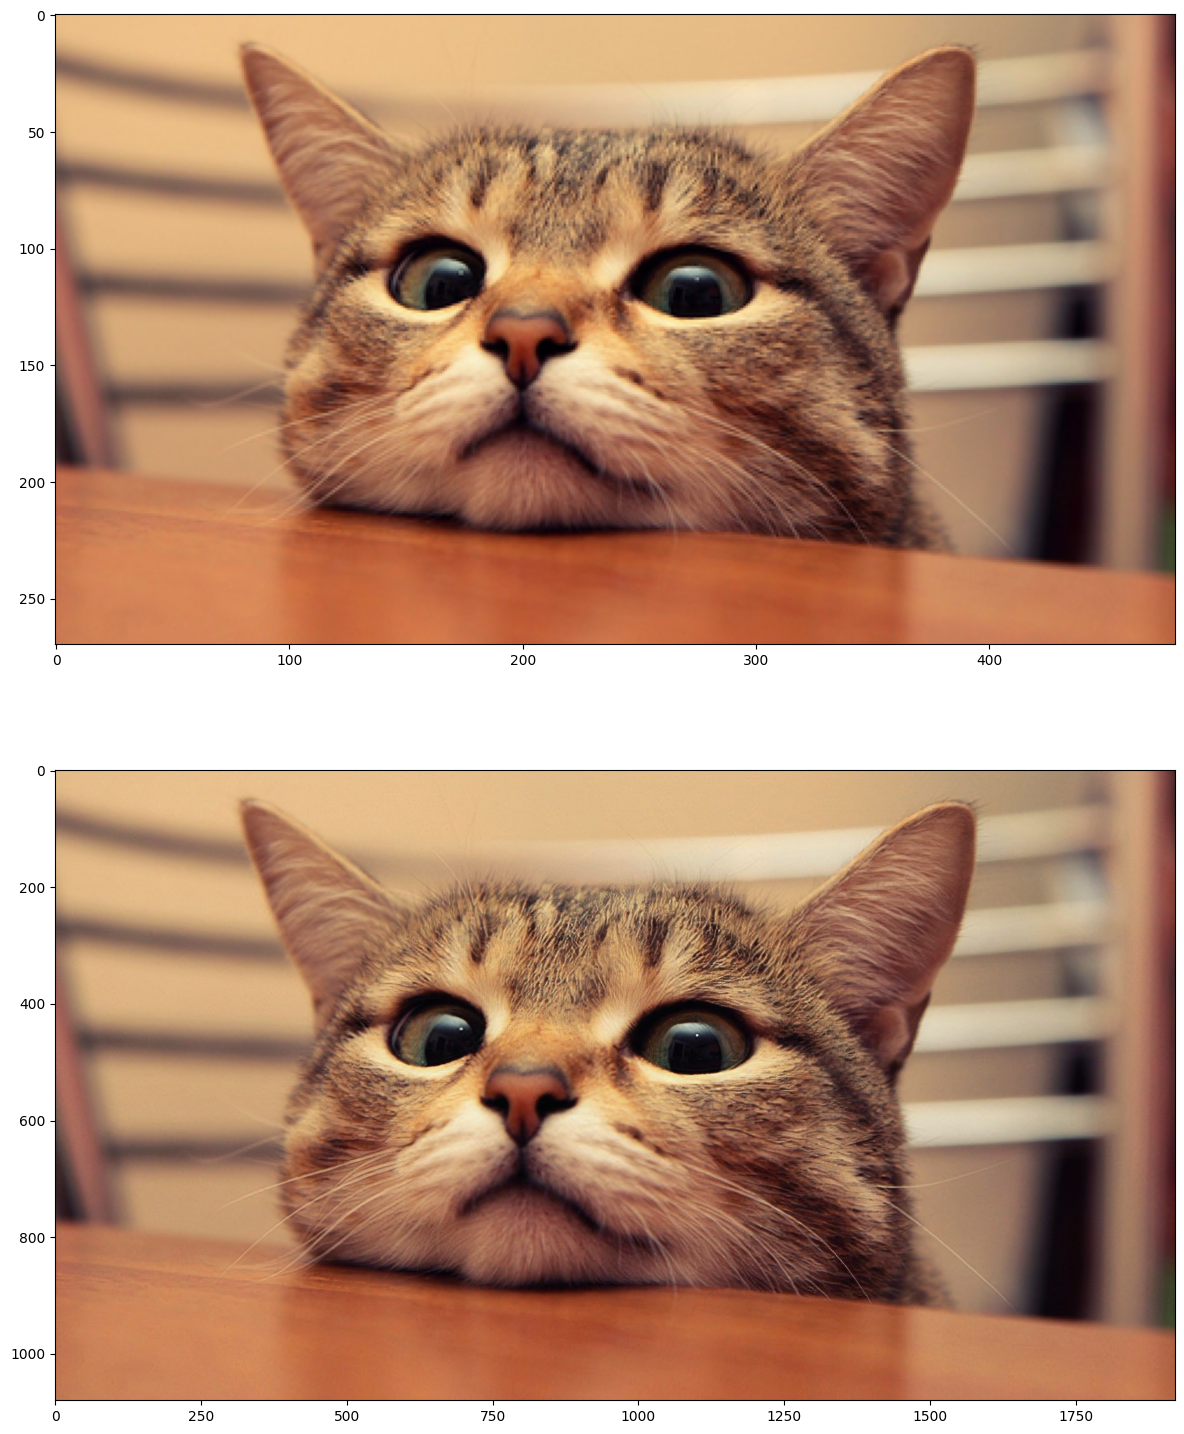

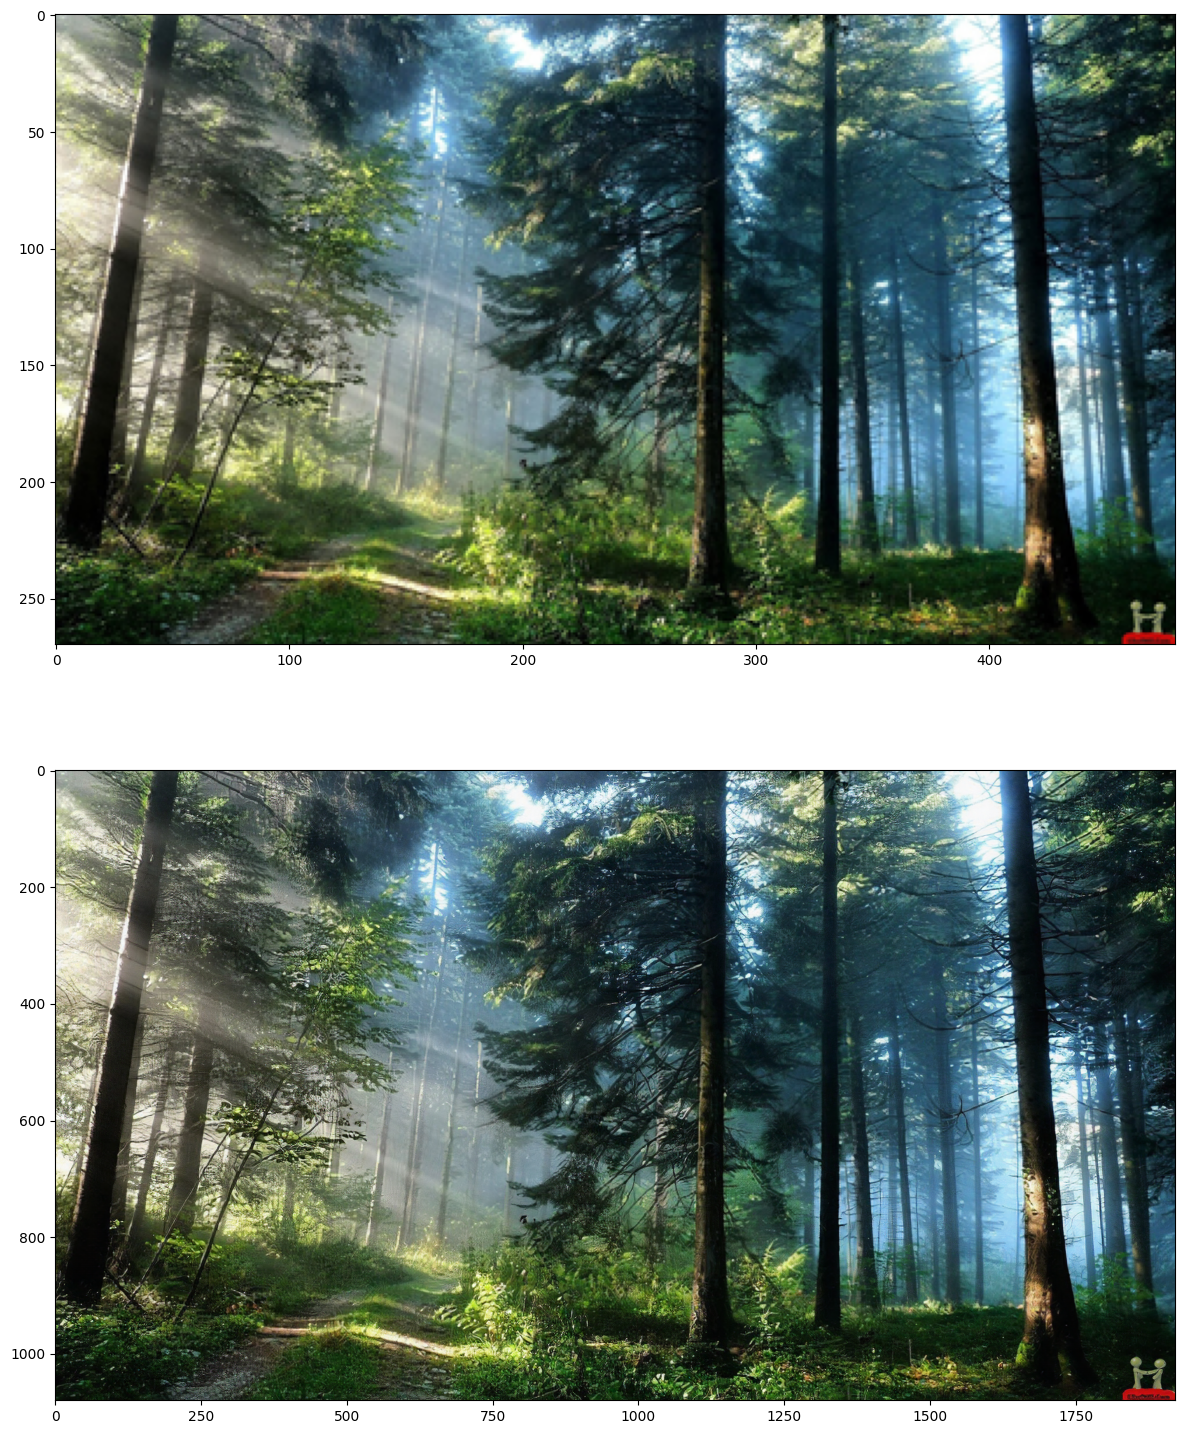

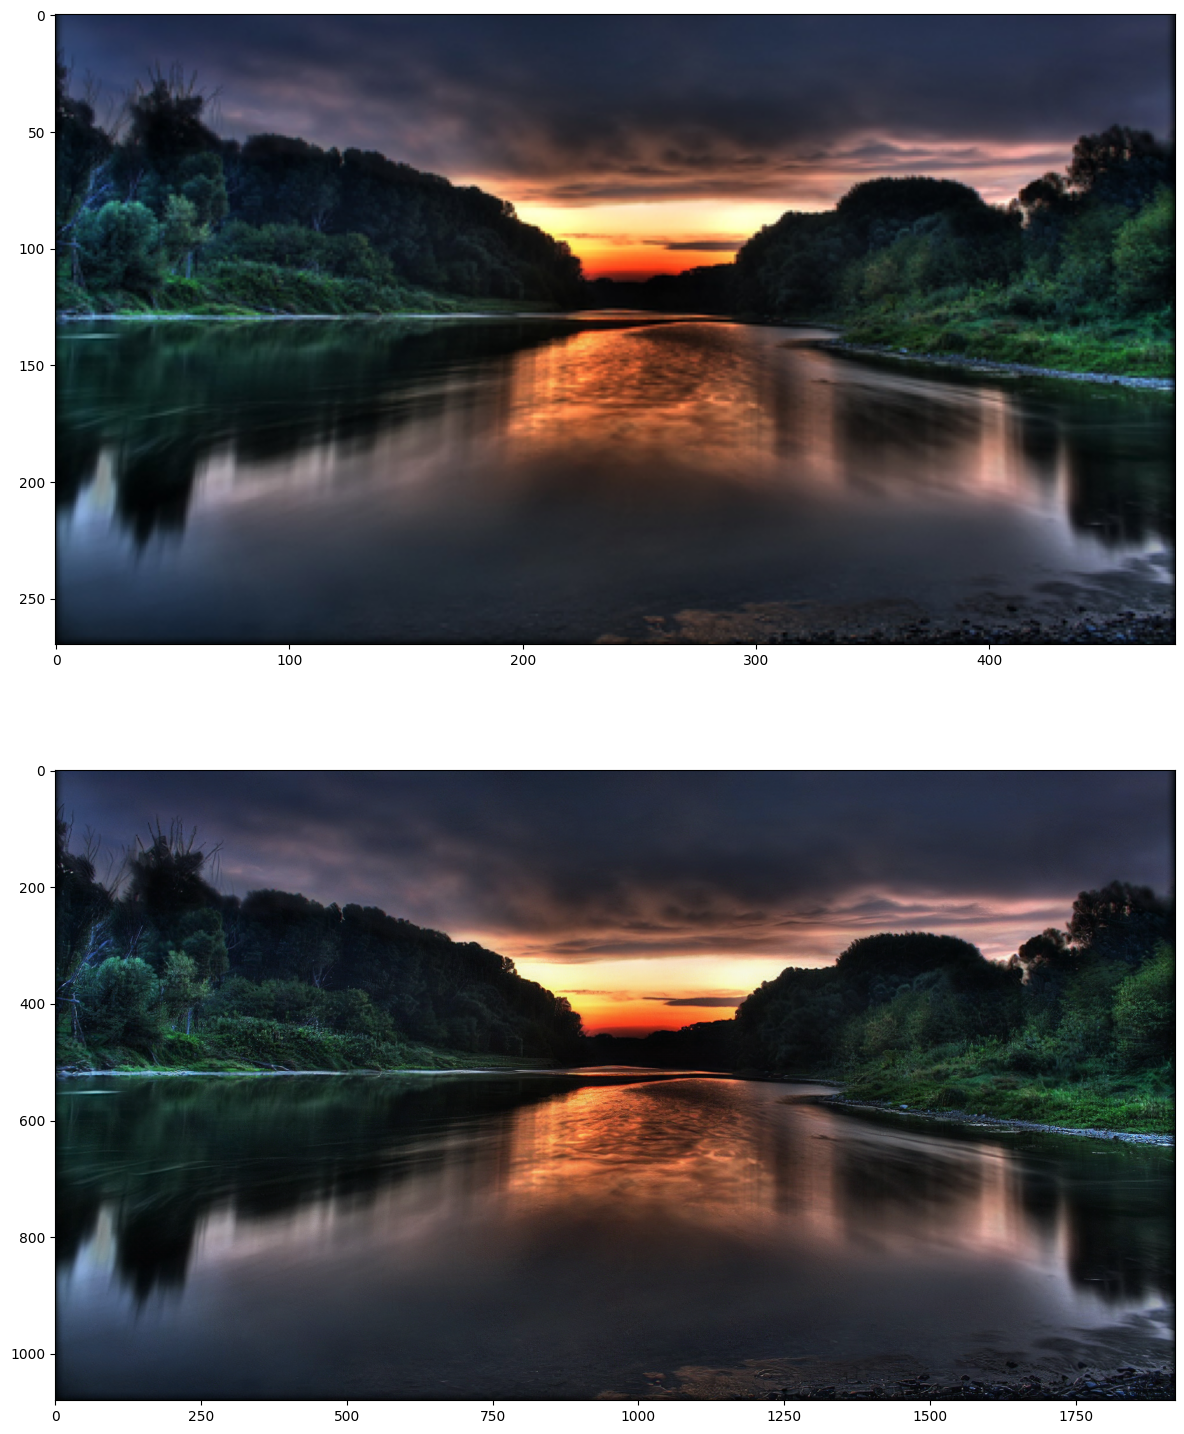

In [ ]:
upscalendisplay()